<a href="https://colab.research.google.com/github/HossamElsrah/Arabic-company-reviews-Sentiment-Analysis/blob/main/Arabic_company_reviews_Using_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [24]:
import pandas as pd

reviews = pd.read_csv('CompanyReviews.csv')
reviews.sample(10)

,Unnamed: 0,review_description,rating,company
8983,8983,خرا خرا,1,talbat
31184,31184,الحمد الله بدون دف,1,talbat
5065,5065,رائعة وممتازة,1,talbat
19161,19161,تطبيق نسانا الجوع شكراً,1,talbat
34417,34417,سيء جدا بعد حجز سابق من اليوم الذي قبل موعد ال...,-1,swvl
34759,34759,تجربة رائعة,1,swvl
11644,11644,تطبيق جيد جداً سمعت انهم يعطون العملاء 65 ريال...,1,talbat
11508,11508,وفرو خدمة توصيل لكل المناطق في الأردن دون استثناء,-1,talbat
33083,33083,حسبي الله ونعم الوكيل فيكوا مش عارفه افتح ولا ...,-1,swvl
39146,39146,وحش جدا جدا ومش عايز يعمل تسجيل دخول,-1,telecom_egypt


In [25]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40046 entries, 0 to 40045
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          40046 non-null  int64 
 1   review_description  40045 non-null  object
 2   rating              40046 non-null  int64 
 3   company             40046 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [26]:
reviews = reviews.drop('Unnamed: 0', axis=1)
reviews = reviews.dropna()

# Data Preprocessing

In [27]:
import re

def find_non_arabic_chars(text):
    non_arabic_pattern = re.compile(r'[^أ-ي\s]')
    found_chars = sorted(list(set(non_arabic_pattern.findall(text))))
    return "".join(found_chars)

reviews['non_arabic_issues'] = reviews['review_description'].apply(find_non_arabic_chars)

# **This is what you need for Jupyter/Colab to display the full DataFrame:**
reviews[['review_description', 'non_arabic_issues']]

# To get a unique list of all non-Arabic characters found across the entire DataFrame:
all_non_arabic_found = set("".join(reviews['non_arabic_issues'].tolist()))
print(f"\nAll unique non-Arabic characters found in the dataset: {sorted(list(all_non_arabic_found))}")


All unique non-Arabic characters found in the dataset: ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¢', '£', '¤', '¥', '¦', '§', '©', '«', '¬', '°', '±', '²', '³', '¸', '¹', '»', '¿', 'Ã', 'Ç', '×', 'ß', 'ç', '÷', 'ù', 'ü', 'č', 'ğ', 'ī', 'ş', 'Š', 'ů', '˝', '̯', '̷', '͡', 'Ζ', 'Η', 'έ', 'α', 'δ', 'η', 'ι', 'ν', 'ξ', 'π', 'ω', 'Ж', 'К', 'Т', 'Я', 'а', 'б', 'в', 'д', 'е', 'ж', 'и', 'й', 'л', 'м', 'н', 'о', 'р', 'с', 'т', 'у', 'х', 'ч', 'щ', 'ь', 'ю', 'ב', 'ם', '،', '؍', '؏', '؛', '؟', 'ء', 'آ', 'ً', 'ٌ', 'ٍ', 'َ', 'ُ', 'ِ', 'ّ', 'ْ', 'ٓ', 'ٔ', 'ٕ', '٠', '١', '٢

In [28]:
import re
import pandas as pd
import emoji
from googletrans import Translator
import string
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer

# Initialize libraries and tools
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

translator = Translator()
arabic_stopwords = set(stopwords.words('arabic'))
stemmer = ISRIStemmer()

arabic_numbers_to_text = {
    '0': 'صفر', '1': 'واحد', '2': 'اثنين', '3': 'ثلاثة', '4': 'اربعة',
    '5': 'خمسة', '6': 'ستة', '7': 'سبعة', '8': 'ثمانية', '9': 'تسعة',
    '٠': 'صفر', '١': 'واحد', '٢': 'اثنين', '٣': 'ثلاثة', '٤': 'اربعة',
    '٥': 'خمسة', '٦': 'ستة', '٧': 'سبعة', '٨': 'ثمانية', '٩': 'تسعة'
}

arabizi_conversion_dict = {
    'th': 'ث', 'gh': 'غ', 'sh': 'ش', 'kh': 'خ', 'dh': 'ذ',
    'a': 'ا', 'b': 'ب', 't': 'ت', 'g': 'ج', 'd': 'د', 'r': 'ر', 'z': 'ز',
    's': 'س', 'f': 'ف', 'q': 'ق', 'k': 'ك', 'l': 'ل', 'm': 'م', 'n': 'ن',
    'h': 'ه', 'w': 'و', 'y': 'ي',
    '2': 'ء', '3': 'ع', '5': 'خ', '7': 'ح', '8': 'ق', '9': 'ص', '6': 'ط',
}

# A comprehensive function for text cleaning and preprocessing
def comprehensive_cleaner_and_preprocess(text):
    if not isinstance(text, str):
        return ''

    # 1. Remove control characters
    text = re.sub(r'[\u200B-\u200F\u00AD\u202A-\u202E\u2060-\u206F]', '', text)

    # 2. Convert emojis to Arabic description
    text = emoji.demojize(text, language='ar').replace(':', ' ').replace('_', ' ')

    # 3. Convert numbers to Arabic text
    for digit, arabic_word in arabic_numbers_to_text.items():
        text = text.replace(digit, arabic_word)

    # 4. Normalize elongated words
    text = re.sub(r'(.)\1+', r'\1\1', text)

    # 5. Define and apply Arabizi to Arabic conversion
    def arabizi_to_arabic_local(text):
        for latin, arabic in arabizi_conversion_dict.items():
            text = text.replace(latin, arabic)
        return text

    words = text.split()
    processed_words = []

    # Cache for translated words to avoid re-translating
    words_to_translate_cache = {}

    for word in words:
        # Apply Arabizi conversion first
        arabized_word = arabizi_to_arabic_local(word)

        # 6. Translate remaining purely English words
        if re.fullmatch(r'[a-zA-Z]+', arabized_word):
            if arabized_word not in words_to_translate_cache:
                try:
                    words_to_translate_cache[arabized_word] = translator.translate(arabized_word, src='en', dest='ar').text
                except Exception:
                    words_to_translate_cache[arabized_word] = ''
            processed_words.append(words_to_translate_cache[arabized_word])
        else:
            processed_words.append(arabized_word)

    text = " ".join(processed_words)

    # 7. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation.replace('_', '')))

    # 8. Normalize Arabic characters
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("[گڤچپڜڪڧٱ]", "ا", text)

    # 9. Remove any remaining non-Arabic characters
    text = re.sub(r'[^\u0621-\u064A\s]', '', text)

    # 10. Stopword removal and stemming
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in arabic_stopwords]
    stemmed_words = [stemmer.stem(word) for word in filtered_tokens]

    # 11. Re-join words and normalize spaces
    text = " ".join(stemmed_words)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the function to the 'reviews' DataFrame
reviews['processed_review'] = reviews['review_description'].apply(comprehensive_cleaner_and_preprocess)

print("Data processing is complete. Results are in the 'processed_review' column.")
print("Here are some examples:")
reviews[['review_description', 'processed_review']].sample(5)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Data processing is complete. Results are in the 'processed_review' column.
Here are some examples:


,review_description,processed_review
15008,احب هالتطبيق سهل الاستخدام,احب هالتطبيق سهل خدم
19846,حلو عجيب,حلو عجب
22757,ابداع وسهولة وسرعه___اشكركم,بدع سهل سرع شكر
37925,كان جيدا منذ فترة والآن عندما احاول فتح البرنا...,جيد فتر وال عند حول فتح رنمج اتم عمل دفع بلغ خ...
24623,مافي الاردن,افي ارد


In [29]:
columns_to_drop = ['review_description', 'non_arabic_issues']
reviews = reviews.drop(columns=columns_to_drop)

In [30]:
reviews['rating'].value_counts()

,count
rating,
1,23921
-1,14199
0,1925


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
reviews['rating'] = le.fit_transform(reviews['rating'])

In [32]:
reviews['rating'].value_counts()

,count
rating,
2,23921
0,14199
1,1925


In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=None, oov_token="<oov>")
tokenizer.fit_on_texts(reviews['processed_review'])
sequences = tokenizer.texts_to_sequences(reviews['processed_review'])

review_lengths = [len(seq) for seq in sequences]
max_sequence_length = int(np.percentile(review_lengths, 95))
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

X = np.array(padded_sequences)

y = reviews['rating']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32036, 29)
X_test shape: (8009, 29)
y_train shape: (32036,)
y_test shape: (8009,)


In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

# A. Display the original class distribution
print("Original training dataset shape %s" % Counter(y_train))

sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

print('Resampled training dataset shape %s' % Counter(y_train_balanced))

Original training dataset shape Counter({2: 19137, 0: 11359, 1: 1540})
Resampled training dataset shape Counter({2: 19137, 0: 19137, 1: 19137})


# Model Building

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# --- Define Model Hyperparameters ---
# You should get these from your data preprocessing step
max_words = 13658
embedding_dim = 128
lstm_units = 128  # Increased the number of units
output_classes = 3
max_sequence_length = 100 # Adjust this based on your tokenized sequences

# --- Build the Model Architecture ---
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))

# First Bidirectional LSTM layer with return_sequences=True to pass to the next layer
model.add(Bidirectional(LSTM(units=lstm_units, return_sequences=True)))
model.add(LayerNormalization()) # Add LayerNormalization for stability and speed

# Second Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=lstm_units, return_sequences=False)))

# Dropout layer to prevent overfitting
model.add(Dropout(0.6)) # Adjusted dropout rate

# Output Dense layer
model.add(Dense(units=output_classes, activation='softmax'))

# --- Compile the Model ---
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Define Callbacks for Training ---
callbacks = [
    # Stops training when validation loss stops improving
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    # Saves the best model during training
    ModelCheckpoint('best_lstm_model.h5', save_best_only=True)
]

# --- Print the Model Summary ---
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(
    X_train_balanced,
    y_train_balanced,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=callbacks
)
history

Epoch 1/50
1794/1795 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5909 - loss: 0.8643

1795/1795 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.5909 - loss: 0.8642 - val_accuracy: 0.7869 - val_loss: 0.5685
Epoch 2/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7234 - loss: 0.6431 - val_accuracy: 0.7695 - val_loss: 0.5903
Epoch 3/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.7637 - loss: 0.5584 - val_accuracy: 0.7796 - val_loss: 0.6068
Epoch 4/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.7865 - loss: 0.5019 - val_accuracy: 0.7614 - val_loss: 0.6736
Epoch 5/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8112 - loss: 0.4482 - val_accuracy: 0.7596 - val_loss: 0.7285
Epoch 6/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.8329 - loss: 0.4004 - val_accuracy: 0.7624 - val_loss: 0.7468
Epoch 7/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8559 - loss: 0.3518 - val_accuracy: 0.7549 - val_loss: 0.8070
Epoch 8/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8735 - loss: 0.30

# Evaulation

251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
--- Classification Report ---
               precision    recall  f1-score   support

Negative (-1)       0.85      0.72      0.78      2840
  Neutral (0)       0.12      0.26      0.17       385
 Positive (1)       0.87      0.87      0.87      4784

     accuracy                           0.79      8009
    macro avg       0.61      0.62      0.61      8009
 weighted avg       0.83      0.79      0.80      8009



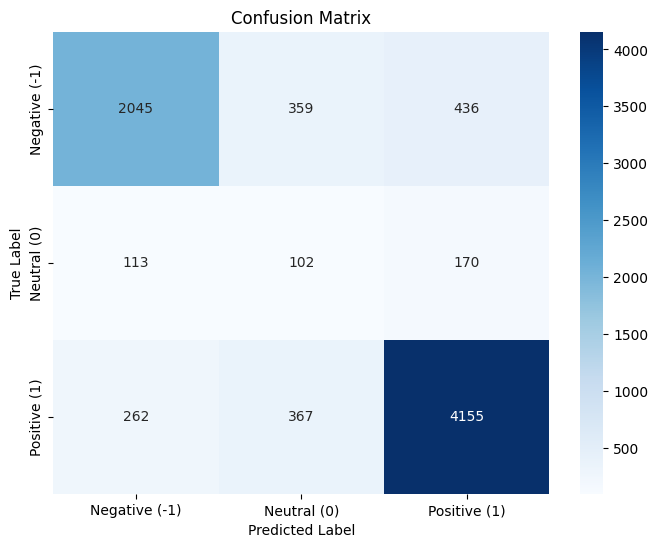

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = y_test

# Adjust the target_names to match the new labels
# -1 -> 0
# 0 -> 1
# 1 -> 2
new_target_names = ['Negative (-1)', 'Neutral (0)', 'Positive (1)']
# Make sure your y_test is also label encoded in the same way

print("--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=new_target_names))

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=new_target_names,
            yticklabels=new_target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The model shows good accuracy for the positive and negative classes.
- However, the performance for the neutral class is low.
- This is likely due to the significant imbalance in the dataset,
as the number of neutral reviews is very small compared to the other classes.
- The model did not have enough data to learn the patterns for the neutral category.